# **Introduction to AI**
## **Final Lab Project**


---

**Reg no: FA22-BAI-032** 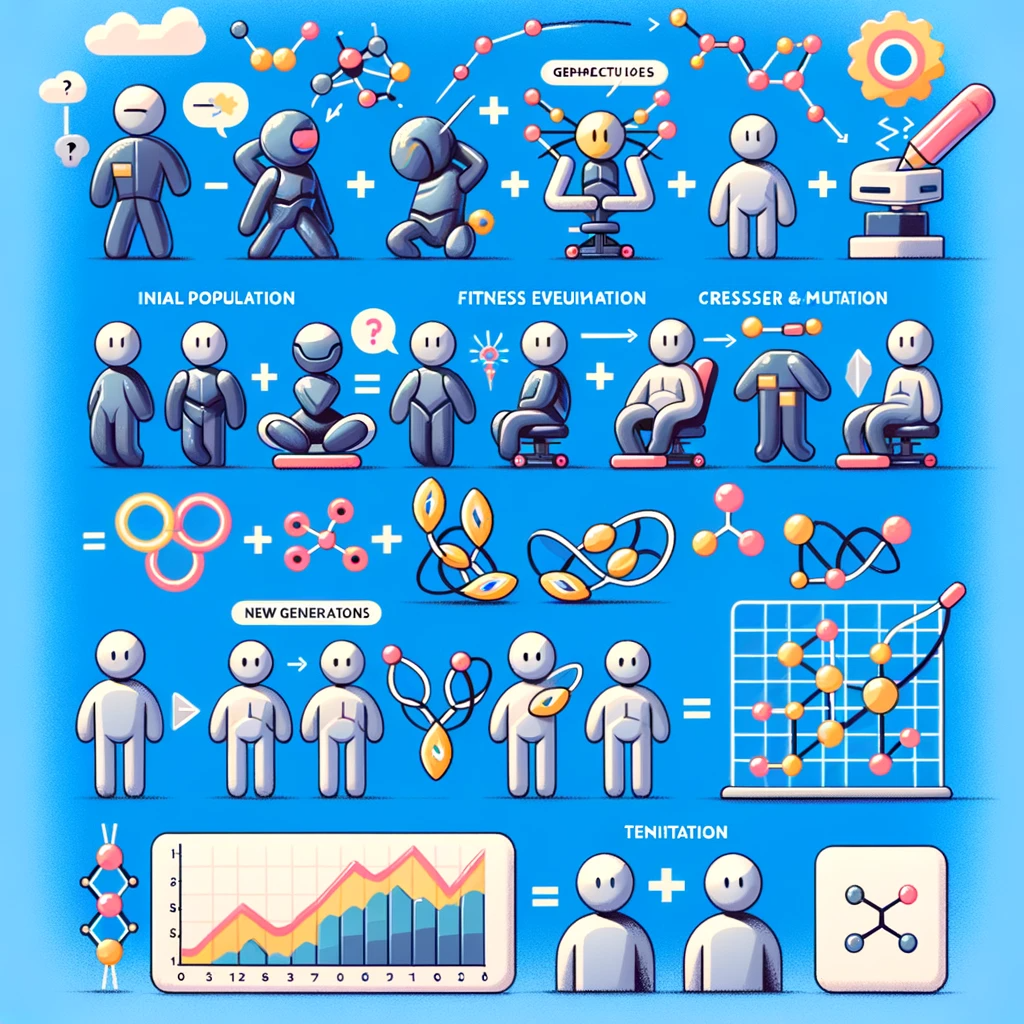

# **Memory Card Matching Game with Genetic Algorithm (GA)**

### **Introduction**
This report delves into the working of a Python-based Memory Card Matching Game, enhanced with a Genetic Algorithm (GA). The game features a set of cards, each bearing names of fruits, and the GA's aim is to efficiently determine the best sequence for flipping these cards to find matching pairs.

### **Game Overview**
The game involves a set of 8 cards, each labeled with fruit names: Apple, Banana, Orange, Grapes, Strawberry, Pineapple, Watermelon, Kiwi. These cards are shuffled randomly at the game's onset. The GA's objective is to find the most effective sequence to flip these cards for matching pairs.

## **Genetic Algorithm (GA) - The Engine Behind the Game**
Genetic Algorithms are adaptive heuristic search algorithms premised on the evolutionary ideas of natural selection and genetics. They simulate the process of natural selection where the fittest individuals are selected for reproduction in order to produce offspring of the next generation.
### **Key Components of GA in the Game:**


*   Population: A set of possible solutions to the problem (sequences of flips in this case).
*   Fitness Function: Determines how 'fit' a solution is (how many correct matches it finds).

*   Selection: Best-performing individuals are chosen for reproduction.
*   Crossover: Combining two parent solutions to create children for the next generation.

*   Mutation: Introducing random changes to individual solutions.











## **Implementation**
The Python program defines a class MemoryGameGA encapsulating the GA logic. The game's flow involves initializing the population, selecting the fittest individuals, applying crossover and mutation, and evolving the population over generations to find the optimal solution.

### **Population Initialization:**
Each individual in the population is a sequence of flips (represented as tuples of card indices). For instance, [(2, 3), (1, 4)] means flipping cards at positions 2 and 3, then 1 and 4.

### **Fitness Calculation:**
Fitness is determined by the number of correct matches in the sequence. A match occurs when two flipped cards have the same label.

### **Genetic Operations - Crossover and Mutation:**
Crossover exchanges segments of parent sequences to create diverse offspring.
Mutation introduces random changes to avoid local minima and maintain diversity.

DALL·E 2023-12-29 06.22.47 - Create a line graph showing the progress of a genetic algorithm over generations. The x-axis represents generations, the y-axis represents fitness sco.png

## **Program Execution and GA Progression**
 The program prompts the user to input the population size and the number of generations. It then proceeds through the GA process, displaying detailed reports for each generation, showing individual sequences and their fitness. The goal is to achieve the highest fitness score (maximum possible matches).

### **Sample Output:**
In the provided sample run, the GA achieves the best sequence in 5 generations, with a computation time of 0.02 seconds. The best sequence found is [(5, 6), (2, 1), (3, 7), (4, 0)], indicating the optimal order of card flips.

## **Visualization of GA Progress**
The program employs matplotlib for plotting the GA's progress, visually representing the average and best fitness across generations. This graphical representation provides an intuitive understanding of the GA's convergence towards the optimal solution.

## **Conclusion**
This implementation of the Memory Card Matching Game using a Genetic Algorithm demonstrates the efficacy of GAs in solving optimization problems. It elegantly combines the principles of evolutionary biology with computational algorithms to find efficient solutions in complex problem spaces, such as games.

# **Flip the cards memory game**

## **Python code for memory game:**

In [ ]:
import random
import time


NUM_CARDS = 8  # Number of cards in the game
fruits = ["Apple", "Banana", "Orange", "Grapes", "Strawberry", "Pineapple", "Watermelon", "Kiwi"]

# Initialize game board with cards
cards = [f" {fruits[i // 2]} " for i in range(NUM_CARDS)]
random.shuffle(cards)
board = ['X'] * NUM_CARDS


def display_board():
    for i, card in enumerate(board):
        print(f'{card:^12}', end='')
        if (i + 1) % 4 == 0:
            print()
    print()


def choose_card():
    while True:
        try:
            choice = int(input('Enter the card number (0-7): '))
            if 0 <= choice < NUM_CARDS:
                return choice
            else:
                print('Please enter a number between 0 and 7.')
        except ValueError:
            print('Invalid input. Please enter a number.')


def play_game():
    display_board()
    matched_count = 0
    attempts = 0
    start_time = time.time()

    while matched_count < NUM_CARDS:
        print("Select two cards to flip (0-7): ")
        choice1 = choose_card()
        choice2 = choose_card()
        attempts += 1

        print(f"You selected: {cards[choice1]} and {cards[choice2]}")

        if choice1 == choice2:
            print("You cannot select the same card twice!")
            continue

        if cards[choice1] == cards[choice2] and board[choice1] == 'X' and board[choice2] == 'X':
            board[choice1] = cards[choice1]
            board[choice2] = cards[choice2]
            matched_count += 2
            display_board()
            print("Match found!")
        else:
            print("No match. Try again!")
        print()

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Congratulations! You've matched all cards in {attempts} attempts.")
    print(f"Total time taken: {elapsed_time:.2f} seconds.")


def main():
    while True:
        print("\nMenu:")
        print("1. Play Memory Game (Human vs. Human)")
        print("2. Quit")

        choice = input("Enter your choice (1-2): ")

        if choice == '1':
            play_game()
        elif choice == '2':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid choice. Please enter a valid option.")



if __name__ == "__main__":
    main()


## **Python code for flip the card memory game GA agent:**

In [ ]:
import random
import matplotlib.pyplot as plt
import time

class MemoryGameGA:
    def __init__(self, num_cards, population_size):
        self.num_cards = num_cards
        self.population_size = population_size
        self.population = self.initialize_population()

    def initialize_population(self):
        return [[(random.randint(0, self.num_cards - 1), random.randint(0, self.num_cards - 1)) for _ in range(self.num_cards // 2)] for _ in range(self.population_size)]

    def calculate_fitness(self, sequence, cards):
        fitness, matched = 0, set()
        for flip1, flip2 in sequence:
            if flip1 in matched or flip2 in matched or flip1 == flip2:
                continue
            if cards[flip1] == cards[flip2]:
                fitness += 1
                matched.update([flip1, flip2])
        return fitness

    def select_parents(self, cards):
        return sorted(self.population, key=lambda seq: self.calculate_fitness(seq, cards), reverse=True)[:self.population_size // 2]

    def crossover(self, parent1, parent2):
        child1, child2 = parent1.copy(), parent2.copy()
        for i in range(len(parent1)):
            if random.random() < 0.5:
                child1[i], child2[i] = child2[i], child1[i]
        return child1, child2

    def mutate(self, sequence):
        for i in range(len(sequence)):
            if random.random() < 0.01:
                sequence[i] = (random.randint(0, self.num_cards - 1), random.randint(0, self.num_cards - 1))
        return sequence

    def evolve_population(self, cards):
        new_population, parents = [], self.select_parents(cards)
        while len(new_population) < self.population_size:
            parent1, parent2 = random.sample(parents, 2)
            child1, child2 = self.crossover(parent1, parent2)
            new_population.append(self.mutate(child1))
            if len(new_population) < self.population_size:
                new_population.append(self.mutate(child2))
        self.population = new_population

    def play_sequence(self, sequence, cards):
        board = ['X'] * self.num_cards
        for flip1, flip2 in sequence:
            if board[flip1] != 'X' or board[flip2] != 'X' or flip1 == flip2: continue
            board[flip1], board[flip2] = cards[flip1], cards[flip2]
            print(f"Flipping cards at positions {flip1} and {flip2}:")
            self.display_board(board)
            if cards[flip1] != cards[flip2]:
                board[flip1] = 'X'
                board[flip2] = 'X'

    @staticmethod
    def display_board(board):
        for i, card in enumerate(board):
            print(f'{card:^12}', end='')
            if (i + 1) % 4 == 0: print()
        print()

def play_game_with_ga(cards, population_size=200, generations=100):
    start_time = time.time()  # Start timer
    ga_solver = MemoryGameGA(len(cards), population_size)
    best_sequence, best_fitness = None, 0
    average_fitness_trend, best_fitness_trend = [], []

    for generation in range(generations):
        ga_solver.evolve_population(cards)
        average_fitness = sum(ga_solver.calculate_fitness(ind, cards) for ind in ga_solver.population) / len(ga_solver.population)
        current_best = max(ga_solver.population, key=lambda seq: ga_solver.calculate_fitness(seq, cards))
        current_fitness = ga_solver.calculate_fitness(current_best, cards)

        if current_fitness > best_fitness:
            best_fitness, best_sequence = current_fitness, current_best

        average_fitness_trend.append(average_fitness)
        best_fitness_trend.append(best_fitness)

        print(f"\nGeneration {generation + 1} Report:")
        for idx, individual in enumerate(ga_solver.population):
            print(f"Individual {idx + 1}: Sequence {individual}, Fitness: {ga_solver.calculate_fitness(individual, cards)}")
        print(f"Best Individual: {current_best}, Best Fitness: {current_fitness}")
        print(f"average fitness:{average_fitness}, best:{best_fitness}")

        if best_fitness == len(cards) // 2:
            break
    end_time = time.time()  # End timer
    total_time = end_time - start_time
    print(f"GA found the best sequence in {generation + 1} generations.")
    print(f"Total computation time: {total_time:.2f} seconds.")

    plt.plot(average_fitness_trend, label='Average Fitness')
    plt.plot(best_fitness_trend, label='Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('GA Fitness Trends')
    plt.legend()
    plt.show()

    return best_sequence


def main():
    # Ask for user input
    population_size = int(input("Enter population size: "))
    generations = int(input("Enter number of generations: "))

    # Ensure the input values are positive
    if population_size <= 0 or generations <= 0:
        print("Invalid input. Please enter positive numbers.")
        return

    # Rest of the game setup
    NUM_CARDS = 8
    fruits = ["Apple", "Banana", "Orange", "Grapes", "Strawberry", "Pineapple", "Watermelon", "Kiwi"]
    cards = [f" {fruits[i // 2]} " for i in range(NUM_CARDS)]
    random.shuffle(cards)

    # Play the game with GA
    ga_solver = MemoryGameGA(len(cards), population_size)
    best_sequence = play_game_with_ga(cards, population_size, generations)
    print("\nBest sequence found by GA:", best_sequence)

    # Display the best sequence play on the board
    print("\nBest sequence to play:")
    ga_solver.play_sequence(best_sequence, cards)

if __name__ == "__main__":
    main()


Enter population size: 50
Enter number of generations: 30

Generation 1 Report:
Individual 1: Sequence [(3, 4), (4, 3), (3, 6), (2, 3)], Fitness: 1
Individual 2: Sequence [(0, 7), (0, 4), (3, 4), (1, 7)], Fitness: 1
Individual 3: Sequence [(5, 7), (2, 1), (5, 6), (1, 7)], Fitness: 1
Individual 4: Sequence [(2, 3), (6, 2), (6, 7), (4, 3)], Fitness: 1
Individual 5: Sequence [(1, 4), (2, 2), (2, 5), (1, 4)], Fitness: 1
Individual 6: Sequence [(6, 0), (6, 6), (0, 5), (3, 0)], Fitness: 0
Individual 7: Sequence [(6, 5), (3, 4), (1, 3), (3, 0)], Fitness: 1
Individual 8: Sequence [(2, 4), (1, 0), (6, 0), (2, 7)], Fitness: 0
Individual 9: Sequence [(0, 0), (4, 7), (4, 1), (2, 6)], Fitness: 1
Individual 10: Sequence [(6, 6), (2, 7), (1, 7), (4, 5)], Fitness: 0
Individual 11: Sequence [(0, 7), (2, 5), (6, 6), (2, 0)], Fitness: 1
Individual 12: Sequence [(2, 3), (2, 3), (6, 6), (1, 2)], Fitness: 1
Individual 13: Sequence [(6, 0), (5, 1), (2, 5), (7, 6)], Fitness: 0
Individual 14: Sequence [(7, 0),


Best sequence found by GA: [(3, 2), (4, 1), (5, 6), (7, 0)]

Best sequence to play:
Flipping cards at positions 3 and 2:
     X           X         Banana      Banana   
     X           X           X           X      

Flipping cards at positions 4 and 1:
     X         Orange      Banana      Banana   
   Orange        X           X           X      

Flipping cards at positions 5 and 6:
     X         Orange      Banana      Banana   
   Orange      Apple       Apple         X      

Flipping cards at positions 7 and 0:
   Grapes      Orange      Banana      Banana   
   Orange      Apple       Apple       Grapes   



## **Visulaization:**
The visualization part in the Python code uses Matplotlib to plot the trends of average fitness and best fitness across generations in the Genetic Algorithm (GA). The graph has generations on the x-axis and fitness values on the y-axis. Two lines are plotted: one for the average fitness of the population and another for the best fitness found in each generation. The average fitness line shows the overall progress of the population, while the best fitness line highlights the performance of the top-performing individual. This graph helps in understanding how the GA evolves over time, indicating if and how quickly the algorithm is converging towards optimal or near-optimal solutions. The visualization thus provides a clear and informative view of the algorithm's performance and efficiency in solving the Memory Game.

Figure_1.png

Figure_3.png

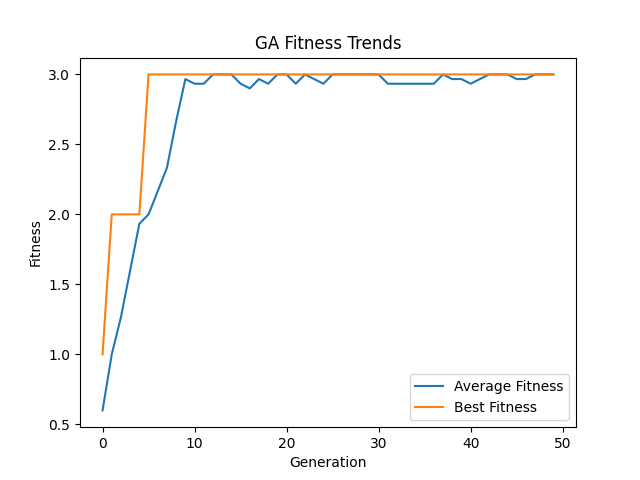

Figure_6.png

The visualization part of the code using Matplotlib plots two trends: average fitness and best fitness of the population over generations in the Genetic Algorithm (GA).

*Average Fitness Trend:* This represents the average fitness score of the entire population in each generation. It gives an insight into how well the population as a whole is performing. Typically, you would expect this value to increase over time as the GA improves the overall fitness of the population.

*Best Fitness Trend:* The best fitness trend is vital as it indicates the best solution found by the Genetic Algorithm in each generation. It serves as a key indicator of the algorithm's ability to find optimal or near-optimal solutions. The expected behavior is that the best fitness either gradually increases or reaches a plateau as the algorithm converges towards the most effective solution. This trend is essential for gauging the success of the GA in optimizing the problem at hand and identifying the most suitable strategy for the memory game.

## **Conclusion**
This Python code implements a Genetic Algorithm (GA) to solve a Memory Game. The game consists of a certain number of cards, and the goal is to find pairs of matching cards. The GA evolves a population of sequences representing attempts to find these pairs. The fitness of each sequence is determined by how many correct pairs it finds. The algorithm involves selection, crossover, and mutation to evolve the population towards better solutions over generations. The code also includes visualization of fitness trends and the ability to play the game based on the best sequence found by the GA. The goal is to optimize the sequence of card selections to maximize the number of matches in the game.